In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
# Read the CSV data into the pandas dataframe
file = '../data/data.csv'
data = pd.read_csv(file)

print("Number of rows, Columns/features:", data.shape)

Number of rows, Columns/features: (3079892, 21)


In [28]:
# Just to make sure that all columns are visible even when the display is smaller, e.g while using notebook!
pd.set_option("display.max.columns", None)

#Set floating point precision to 2 decimal ppoints
pd.set_option("display.precision", 2)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079892 entries, 0 to 3079891
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   uid           object 
 1   sourceMac     object 
 2   sourceIp      object 
 3   destIp        object 
 4   destMac       object 
 5   sourcePort    int64  
 6   destPort      int64  
 7   host          object 
 8   kIn           float64
 9   kOut          float64
 10  inPacketsNo   int64  
 11  outPacketsNo  int64  
 12  protocol      int64  
 13  urgent        int64  
 14  ack           int64  
 15  push          int64  
 16  reset         int64  
 17  syn           int64  
 18  fin           int64  
 19  timestamp     object 
 20  label         object 
dtypes: float64(2), int64(11), object(8)
memory usage: 493.5+ MB


In [12]:
data["inPacketsNo"].describe()

count    3.079892e+06
mean     1.586192e-02
std      2.486541e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.600000e+01
Name: inPacketsNo, dtype: float64

In [13]:
data["outPacketsNo"].describe()

count    3.079892e+06
mean     3.765896e+00
std      4.807555e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.667230e+05
Name: outPacketsNo, dtype: float64

In [6]:
data.isna().any()

uid             False
sourceMac       False
sourceIp        False
destIp          False
destMac         False
sourcePort      False
destPort        False
host             True
kIn             False
kOut            False
inPacketsNo     False
outPacketsNo    False
protocol        False
urgent          False
ack             False
push            False
reset           False
syn             False
fin             False
timestamp       False
label           False
dtype: bool

In [20]:
data.head()

,uid,sourceMac,sourceIp,destIp,destMac,sourcePort,destPort,host,kIn,kOut,inPacketsNo,outPacketsNo,protocol,urgent,ack,push,reset,syn,fin,timestamp,label
0,0ade1931-b0ac-4a5b-ba47-ba6281918861,b8-27-eb-57-1d-79,192.168.1.239,192.168.1.189,ec-08-6b-17-5d-ff,19357,8000,RELU-DESKTOP.lan,0.0,1.015625,0,2,17,0,0,0,0,0,0,2017-06-15 09:43:44,UDP.flood
1,0ade1931-b0ac-4a5b-ba47-ba6281918861,b8-27-eb-57-1d-79,192.168.1.239,192.168.1.189,ec-08-6b-17-5d-ff,1939,8000,RELU-DESKTOP.lan,0.0,1.015625,0,2,17,0,0,0,0,0,0,2017-06-15 09:43:44,UDP.flood
2,0ade1931-b0ac-4a5b-ba47-ba6281918861,b8-27-eb-57-1d-79,192.168.1.239,192.168.1.189,ec-08-6b-17-5d-ff,19668,8000,RELU-DESKTOP.lan,0.0,0.507813,0,1,17,0,0,0,0,0,0,2017-06-15 09:43:44,UDP.flood
3,0ade1931-b0ac-4a5b-ba47-ba6281918861,b8-27-eb-57-1d-79,192.168.1.239,192.168.1.189,ec-08-6b-17-5d-ff,19807,8000,RELU-DESKTOP.lan,0.0,0.507813,0,1,17,0,0,0,0,0,0,2017-06-15 09:43:44,UDP.flood
4,0ade1931-b0ac-4a5b-ba47-ba6281918861,b8-27-eb-57-1d-79,192.168.1.239,192.168.1.189,ec-08-6b-17-5d-ff,19851,8000,RELU-DESKTOP.lan,0.0,0.507813,0,1,17,0,0,0,0,0,0,2017-06-15 09:43:44,UDP.flood


In [21]:
data.tail()

,uid,sourceMac,sourceIp,destIp,destMac,sourcePort,destPort,host,kIn,kOut,inPacketsNo,outPacketsNo,protocol,urgent,ack,push,reset,syn,fin,timestamp,label
3079887,0ade1931-b0ac-4a5b-ba47-ba6281918861,b8-27-eb-57-1d-79,192.168.1.239,192.168.1.255,ff-ff-ff-ff-ff-ff,39481,32412,NaN,0.0,0.113281,0,4,17,0,0,0,0,0,0,2017-06-15 15:58:33,normal
3079888,0ade1931-b0ac-4a5b-ba47-ba6281918861,b8-27-eb-57-1d-79,192.168.1.239,192.168.1.255,ff-ff-ff-ff-ff-ff,35698,32414,NaN,0.0,0.113281,0,4,17,0,0,0,0,0,0,2017-06-15 15:58:43,normal
3079889,0ade1931-b0ac-4a5b-ba47-ba6281918861,b8-27-eb-57-1d-79,192.168.1.239,192.168.1.255,ff-ff-ff-ff-ff-ff,35698,32414,NaN,0.0,0.113281,0,4,17,0,0,0,0,0,0,2017-06-15 15:59:03,normal
3079890,0ade1931-b0ac-4a5b-ba47-ba6281918861,b8-27-eb-57-1d-79,192.168.1.239,192.168.1.255,ff-ff-ff-ff-ff-ff,35698,32414,NaN,0.0,0.113281,0,4,17,0,0,0,0,0,0,2017-06-15 15:59:23,normal
3079891,0ade1931-b0ac-4a5b-ba47-ba6281918861,b8-27-eb-57-1d-79,192.168.1.239,192.168.1.255,ff-ff-ff-ff-ff-ff,35698,32414,NaN,0.0,0.113281,0,4,17,0,0,0,0,0,0,2017-06-15 15:59:53,normal


In [36]:
data["label"].value_counts()

UDP.flood         1979467
TCP.ACK.flood      972532
normal              91386
TCP.HTTP.flood      36373
TCP.SYN.flood          62
GRE.IP                 56
UDP.plain              16
Name: label, dtype: int64

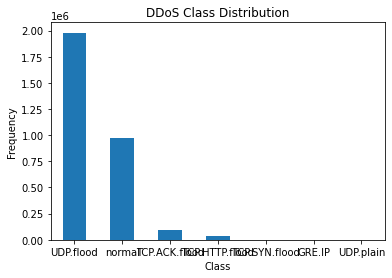

In [39]:
LABELS = data["label"].unique() # Get Unique Values of label column

count_classes = data["label"].value_counts() #Counts the number of sample for each label

# below code plots the bar chart for above information
count_classes.plot(kind = 'bar', rot=0)
plt.title("DDoS Class Distribution")
plt.xticks(range(len(LABELS)), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
#Let's separate the Normal data with everything else

normal_data = data[data["label"]=="normal"]
other_data = data[data["label"]!="normal"]


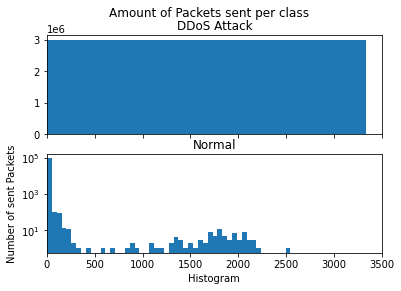

In [56]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount of Packets sent per class')
bins = 50
ax1.hist(other_data["outPacketsNo"], bins = bins)
ax1.set_title('DDoS Attack')
ax2.hist(normal_data["outPacketsNo"], bins = bins)
ax2.set_title('Normal')
plt.xlabel('Histogram')
plt.ylabel('Number of sent Packets')
plt.xlim((0, 3500))
plt.yscale('log')
plt.show();

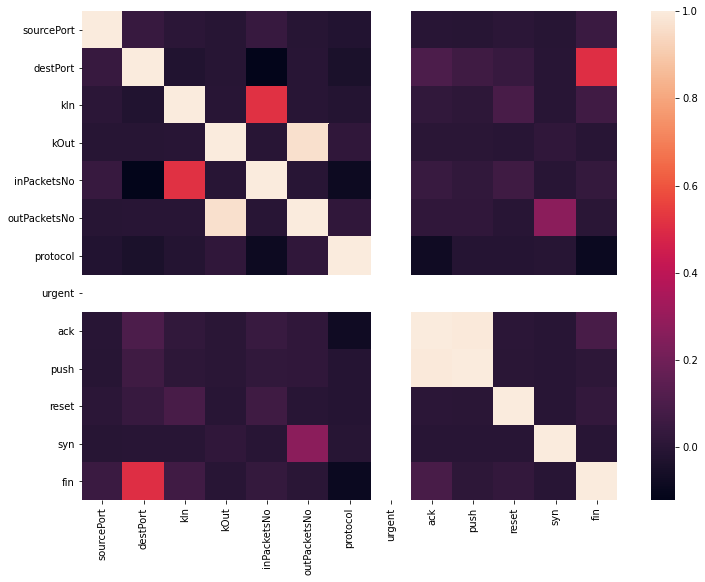

In [58]:
# I just want to check the correlation between each column, to understand what features are corelated
import seaborn as sns
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=1.0,square = True)
plt.show()

In [25]:
data["protocol"].value_counts()

17    2035695
6     1044141
47         56
Name: protocol, dtype: int64

In [26]:
data["urgent"].describe()

count    3079892.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: urgent, dtype: float64

In [29]:
data["ack"].describe()

count    3.08e+06
mean     5.02e-01
std      9.30e+00
min      0.00e+00
25%      0.00e+00
50%      0.00e+00
75%      1.00e+00
max      2.55e+03
Name: ack, dtype: float64